In [96]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
import yfinance as yf
import yfinance as yfin
yfin.pdr_override()

# download stock price data from yahoo finance

In [98]:
amazon = pdr.DataReader(name='AMZN', data_source='yahoo')

In [99]:
amazon.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-08-22,759.849976,752.099976,757.500000,759.479980,1679300,759.479980
2016-08-23,764.700012,761.000000,763.309998,762.450012,1524100,762.450012
2016-08-24,763.409973,755.359985,763.000000,757.250000,1744100,757.250000


# store instantaneous rate of return in a seperate series

In [100]:
amazon_close = amazon['Adj Close']
amazon_return = round(np.log(amazon_close).diff()* 100,2)
amazon_return.head(5)

Date
2016-08-22     NaN
2016-08-23    0.39
2016-08-24   -0.68
2016-08-25    0.26
2016-08-26    1.28
Name: Adj Close, dtype: float64

# plot the series

<AxesSubplot:xlabel='Date'>

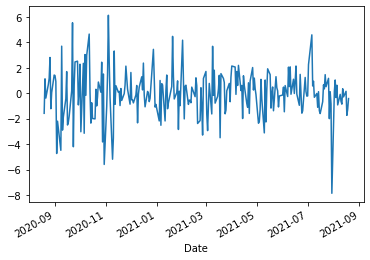

In [101]:
amazon_return[-253:].plot()#daily price change jumps around alot (lots of unpredictible variation in way price moves)

# pandas describe function gives descriptive statistics, default assumes you are dealing with a sample pandas also deals with missing values by omitting them

In [102]:
amazon_return.describe()

count    1257.000000
mean        0.114129
std         1.848762
min        -8.250000
25%        -0.720000
50%         0.140000
75%         1.040000
max        12.410000
Name: Adj Close, dtype: float64

# An Alternate more slightly different table of statistics than scipy stats

In [103]:
from scipy import stats

In [104]:
amazon_return.dropna(inplace=True)
stats.describe(amazon_return)



DescribeResult(nobs=1257, minmax=(-8.25, 12.41), mean=0.1141288782816229, variance=3.4179226680905397, skewness=0.05378416119611103, kurtosis=4.392499419594474)

# for comparison generate random numbers that follow normal distribution

In [105]:
from scipy.stats import norm

In [111]:
stats.describe(amazon_return)

DescribeResult(nobs=1257, minmax=(-8.25, 12.41), mean=0.1141288782816229, variance=3.4179226680905397, skewness=0.05378416119611103, kurtosis=4.392499419594474)

In [113]:
n, minmax, mean, variance, skewness, kurtosis = stats.describe(amazon_return)
mini, maxi = minmax


In [114]:
std = variance ** 5

(array([  4.,   8.,  17.,  40., 122., 380., 464., 153.,  39.,  17.,   9.,
          2.,   1.,   0.,   1.]),
 array([-8.25      , -6.87266667, -5.49533333, -4.118     , -2.74066667,
        -1.36333333,  0.014     ,  1.39133333,  2.76866667,  4.146     ,
         5.52333333,  6.90066667,  8.278     ,  9.65533333, 11.03266667,
        12.41      ]),
 <BarContainer object of 15 artists>)

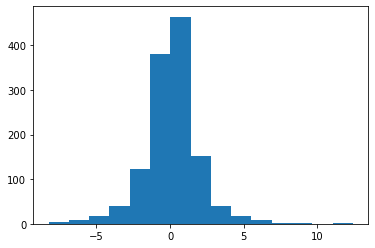

In [115]:
plt.hist(amazon_return, bins = 15)

(array([ 14.,  47., 123., 223., 288., 291., 175.,  68.,  24.,   4.]),
 array([-1304.22651795, -1018.88281852,  -733.53911909,  -448.19541967,
         -162.85172024,   122.49197918,   407.83567861,   693.17937804,
          978.52307746,  1263.86677689,  1549.21047632]),
 <BarContainer object of 10 artists>)

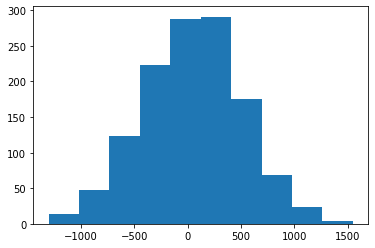

In [118]:
from scipy.stats import norm
x = norm.rvs(mean, std, n)

plt.hist(x)

In [129]:
x_test = stats.kurtosistest(x) #testing whether or not we can consider distribution normal null is that it is normal 
amazon_test = stats.kurtosistest(amazon_return)
print(f'{"      Test Statistic":20}{"p_value":>15}')
print(f'{" " *5}{"-"*30}') 
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amazon_test[0]:13.2f}{amazon_test[1]:16.4f}")

      Test Statistic        p_value
     ------------------------------
x:            -0.32          0.7514
AMZN:         11.46          0.0000
